<a href="https://colab.research.google.com/github/ksp7273/swin-transformer/blob/main/swin_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Swin Transformer Inference

In this video, we will use the Swin Transformer model to classify an image. 

This notebook will be Linked in the Video Description, so that you can copy these URLs that I put in the first cell

Please subscribe and like this video!

In [1]:
URL = "https://raw.githubusercontent.com/SharanSMenon/swin-transformer-hub/main/imagenet_labels.json" # Imagenet labels
!wget https://www.allaboutbirds.org/guide/assets/photo/306327661-480px.jpg -O house_finch.jpg

--2022-12-15 02:56:26--  https://www.allaboutbirds.org/guide/assets/photo/306327661-480px.jpg
Resolving www.allaboutbirds.org (www.allaboutbirds.org)... 172.67.69.67, 104.26.1.144, 104.26.0.144, ...
Connecting to www.allaboutbirds.org (www.allaboutbirds.org)|172.67.69.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23804 (23K) [image/jpeg]
Saving to: ‘house_finch.jpg’

house_finch.jpg     100%[===================>]  23.25K  --.-KB/s    in 0.001s  

2022-12-15 02:56:27 (41.7 MB/s) - ‘house_finch.jpg’ saved [23804/23804]



In [2]:
# I just downloaded our inference image and saved an URL to our class list
import torch
import torchvision
from PIL import Image

In [3]:
# We will now install a library, torchvision image models (timm)
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 5.8 MB/s 
     |████████████████████████████████| 182 kB 26.9 MB/s 


In [4]:
import timm # dont forget
timm.list_models("swin*", pretrained=True) # This will list all the swin transformer models available

['swin_base_patch4_window7_224',
 'swin_base_patch4_window7_224_in22k',
 'swin_base_patch4_window12_384',
 'swin_base_patch4_window12_384_in22k',
 'swin_large_patch4_window7_224',
 'swin_large_patch4_window7_224_in22k',
 'swin_large_patch4_window12_384',
 'swin_large_patch4_window12_384_in22k',
 'swin_s3_base_224',
 'swin_s3_small_224',
 'swin_s3_tiny_224',
 'swin_small_patch4_window7_224',
 'swin_tiny_patch4_window7_224',
 'swinv2_base_window8_256',
 'swinv2_base_window12_192_22k',
 'swinv2_base_window12to16_192to256_22kft1k',
 'swinv2_base_window12to24_192to384_22kft1k',
 'swinv2_base_window16_256',
 'swinv2_cr_small_224',
 'swinv2_cr_small_ns_224',
 'swinv2_cr_tiny_ns_224',
 'swinv2_large_window12_192_22k',
 'swinv2_large_window12to16_192to256_22kft1k',
 'swinv2_large_window12to24_192to384_22kft1k',
 'swinv2_small_window8_256',
 'swinv2_small_window16_256',
 'swinv2_tiny_window8_256',
 'swinv2_tiny_window16_256']

In [5]:
# Let's take the first model
model = timm.create_model('swin_base_patch4_window7_224', pretrained=True) # set pretrained=True so that we can use it directly for inference
# pretrained just means that the model was already trained on IMageNet

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Downloading: "https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_base_patch4_window7_224_22kto1k.pth" to /root/.cache/torch/hub/checkpoints/swin_base_patch4_window7_224_22kto1k.pth


In [7]:
# Now, we will need to create transforms for our image
from torchvision import transforms as T

In [8]:
trans_ = T.Compose([
                    T.Resize(256),
                    T.CenterCrop(224), # Model requries 224x224 images
                    T.ToTensor(), # Converts to pyTorch tensor
                    T.Normalize(timm.data.IMAGENET_DEFAULT_MEAN, timm.data.IMAGENET_DEFAULT_STD) # swin transformer was traiened on normalized data,
                    # therefore we must normalize our images too
])

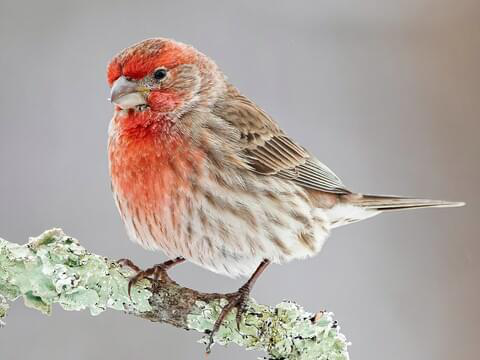

In [9]:
image = Image.open("house_finch.jpg")
image

In [10]:
transformed = trans_(image) # Convert to pytorch tensor
batch = transformed.unsqueeze(0) # The model accepts a batch of image, so we create a batch of 1 image.

In [11]:
with torch.no_grad():
  output = model(batch) # torch.no_grad() incrases speed by disabling gradients.
  # pass in our 'batch' to the model

In [12]:
class_ = output.argmax(dim=1)
class_ # it picked the 12th class

tensor([12])

In [13]:
# Lets load imagenet labels
import json
from urllib.request import urlopen

In [14]:
response = urlopen(URL) # remember i defined URL in the first cell
classes = json.loads(response.read())
len(classes) # Should be 1000 if this works

1000

In [15]:
classes[class_]

'house finch'

In [ ]:
# As you can see, the model predict that this bird was a house finch. Which in fact, it is a house finch.